In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [39]:
data = np.genfromtxt('Raw Ionomics Data_F1 pop.csv',delimiter = ',', skip_header = 2)
data = pd.DataFrame(data)
plt.rcParams['figure.figsize'] = (20,10)

In [40]:
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.012870,18.666730,6.970224,1746.445345,3.845879,1743.118142,1152.944236,5888.311451,15894.22342,...,0.188765,0.813897,7.365774,22.069698,0.004604,0.078727,2.939850,7.347059,0.101190,0.007666
1,2.0,0.011932,14.476929,5.866392,1489.852688,5.825639,2244.684250,1600.441818,7013.400166,13155.45463,...,0.282940,0.648419,8.068232,10.108661,0.005610,-0.043177,4.166140,6.890243,0.145499,0.021108
2,4.0,0.021232,14.713134,10.251955,1467.666224,8.036047,2311.056644,1039.097749,7966.273447,14182.50581,...,0.204521,0.555300,8.369120,24.304910,0.005812,-0.099479,4.589772,9.025915,0.161182,0.006237
3,5.0,0.023306,20.106299,11.773697,2248.108976,9.482051,2315.675046,1091.607046,7514.088622,22550.82189,...,0.201085,0.660282,9.385392,17.753157,0.004598,0.033616,3.461935,15.292360,0.163046,0.006882
4,6.0,0.058813,12.978005,11.043837,3390.636514,29.329605,1995.192533,1096.870563,7608.463923,15982.76017,...,0.353460,2.024096,9.068968,16.656839,0.013593,0.122611,4.690905,13.901449,0.184344,0.008106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,227.0,0.013316,18.748084,7.241536,3346.827794,5.973387,2508.863664,872.168401,5575.859103,25698.73968,...,0.123662,0.648625,8.696161,17.628736,0.005386,0.130372,3.685086,16.473273,0.151210,0.005012
214,230.0,0.011018,27.557412,5.646738,3133.745701,4.148424,2173.914833,1075.422784,6923.877402,23631.46137,...,0.120592,0.481312,7.546654,21.099165,0.007521,0.361999,7.250898,16.954597,0.104782,0.010632
215,231.0,0.006641,18.271167,6.660632,2058.059737,1.934820,2498.975455,1414.350000,9027.711359,16838.61005,...,0.081795,0.436018,10.143454,21.347241,0.002030,0.111207,5.354436,8.852955,0.174862,0.005174
216,233.0,0.027518,12.297046,11.747990,2708.098373,12.501892,1543.348981,876.775433,4467.910281,17207.84861,...,0.131645,0.561454,6.641192,11.868519,0.007891,0.091507,2.441251,11.219189,0.130510,0.004342


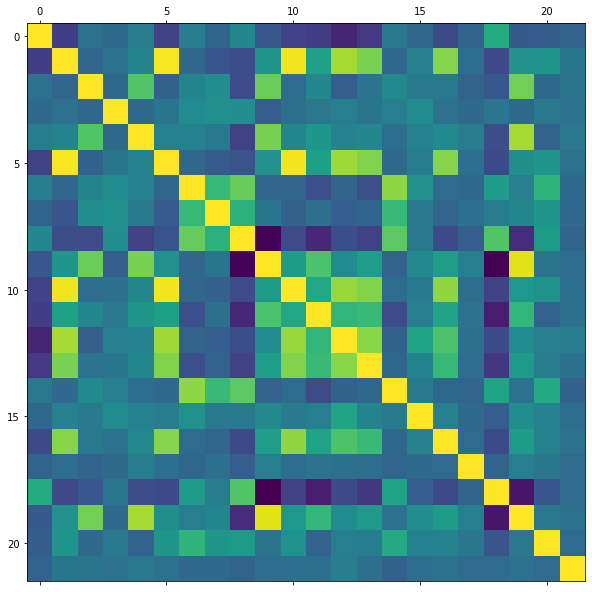

In [3]:
plt.matshow(data.corr())

In [18]:
z = pd.DataFrame(np.arange(4796).reshape(218,22))
z

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
1,22,23,24,25,26,27,28,29,30,31,...,34,35,36,37,38,39,40,41,42,43
2,44,45,46,47,48,49,50,51,52,53,...,56,57,58,59,60,61,62,63,64,65
3,66,67,68,69,70,71,72,73,74,75,...,78,79,80,81,82,83,84,85,86,87
4,88,89,90,91,92,93,94,95,96,97,...,100,101,102,103,104,105,106,107,108,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,4686,4687,4688,4689,4690,4691,4692,4693,4694,4695,...,4698,4699,4700,4701,4702,4703,4704,4705,4706,4707
214,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,...,4720,4721,4722,4723,4724,4725,4726,4727,4728,4729
215,4730,4731,4732,4733,4734,4735,4736,4737,4738,4739,...,4742,4743,4744,4745,4746,4747,4748,4749,4750,4751
216,4752,4753,4754,4755,4756,4757,4758,4759,4760,4761,...,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773


range(1, 22)


In [54]:
for x in range(1,data.shape[1]):
    mean = data[x].mean()
    stdev = data[x].std()
    for y in range(data.shape[0]):
        zscore= (data[x][y] - mean)/stdev
        z[x][y] = zscore
z

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1,0,0,0,-1,0,-1,0,-1,0,...,0,1,-1,0,0,0,-1,0,-1,0
1,93,0,0,0,-1,0,0,0,0,0,...,2,0,0,0,0,0,0,-1,0,0
2,44,0,0,0,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,66,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,88,1,-1,0,1,2,0,0,0,0,...,3,6,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,4686,0,0,0,1,0,0,-1,-1,1,...,0,0,0,0,0,0,0,1,0,0
214,4708,0,1,0,1,0,0,0,0,1,...,0,0,-1,0,0,0,0,1,-1,0
215,4730,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,4752,0,-1,0,0,0,-1,-1,-1,0,...,0,0,-1,0,0,0,-1,0,0,0
